### Projeto Machine Learning II

O projeto deve ser feito em grupo e será apresentado dia 24/07.
Como o projeto será avaliado, o notebook deve conter:
1) Criar uma lista de dicas/técnicas
2) Indicar dentro do notebook cada item da lista(vide exemplo abaixo)

Esses dois itens são obrigatórios, caso contrário não serão aceitos.

### Lista de básica de itens  
A) Uso de um algoritmo de Machine Learning supervisionado e outro não supervisionado do módulo (Breve explicação do funcionamento)  
  
B) Uso da divisão do dataset train / test  
  
C) Uso de Feature Scaling  
  
D) Uso de técnicas de Categórico para Numérico
  
E) Uso de Feature Selection
  
F) Uso do Learning Curve / Analise under / overfiting
  
G) Nota sobre o balanceamento do dataset
  
H) Uso de métrica de avaliação, motivo da escolha
  
I) Uso de Pipeline
  
J) Uso da Otimização de Hiperparâmetros
  
K) Regularização
  
L) Nota de explicação dos hiperparâmetros utilizados
  
M) Uso do Cross Validation
  
N) Uso de mais de um agoritmo e comparação
  
O) ...

In [1]:
# Bibliotecas de manipulação de datasets
import pandas as pd
import numpy as np

#Bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliotecas de Machine Learning
# Divisão teste/treino, cross-validate
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold

# Pre-processamento
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.decomposition import PCA

# Pipeline/Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#from xgboost import XGBClassifier

# Métricas
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay


In [2]:
churn_train = pd.read_csv('customer_churn_dataset-training-master.csv')

churn_test = pd.read_csv('customer_churn_dataset-testing-master.csv')

churn_train.head()

CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls   
0         2.0  30.0  Female    39.0             14.0            5.0  \
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend   
0           18.0          Standard          Annual        932.0  \
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.0  
3              29.0    1.0  
4              20.0    1.0

In [3]:
print(churn_train.shape)
churn_train.info()

(440833, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [3]:
print(churn_test.shape)
churn_train.info()

(64374, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [4]:
#Encontrei essa ferramenta abaixo, que é tipo um describe/info pra dataset, acho ela mais visual e fácil de analisar, mas precisa instalar.
#Caso alguém tenha interesse. pra instalar é só por: "pip install sumarytools" e depois "pip install Jinja2"

#from summarytools import dfSummary
#dfSummary(churn)


Temos 12 colunas sendo destas:
- 1 coluna Target ('Churn')
- 1 coluna de ID
- 3 colunas com informações categóricas
- 7 colunas com informações numéricas

Tamanho dataset Treino: 440.833 amostras

Tamanho dataset Teste: 64.374


In [4]:
#Customer ID pode ser removida
churn_train.drop(columns="CustomerID", inplace=True)
churn_test.drop(columns='CustomerID', inplace=True)

#### Investigando valores nulos nos datasets de treino e teste

In [5]:
# Dataset de Treino
churn_train.isnull().sum()

Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

- Dataset com 1 valor nulo por coluna.

Investigando os valores nulos encontrados:

In [6]:
# Encontrando os valores nulos:
churn_train[churn_train.isnull().any(axis=1)]

Age Gender  Tenure  Usage Frequency  Support Calls  Payment Delay   
199295  NaN    NaN     NaN              NaN            NaN            NaN  \

       Subscription Type Contract Length  Total Spend  Last Interaction  Churn  
199295               NaN             NaN          NaN               NaN    NaN

- Os valores nulos estão concentrados todos em uma única linha, portanto esta será removida.

In [7]:
# No início haviam 440 883 linhas, no final é verificado que uma delas foi removida.
churn_train.dropna(inplace=True)
churn_train.shape[0]

440832

In [8]:
#Investigando valores nulos no dataset de teste
churn_test.isnull().sum()

Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

- Sem valores nulos no dataset de Teste

#### Preprocessamento do dataset de treino e teste

- Standard Scaler para as variáveis numéricas (Age, Tenure, Usage Frequency, Support Calls, Payment Delay, Total Spend, Last Interaction)
- One Hot Encoder para a variável de gênero
- Ordinal Encoder para as variáveis categóricas Subscription Type e Contract Length

In [10]:
# Gender Male = 1, Female = 0
subscription = ['Basic', 'Standard', 'Premium']
# Subscription Basic = 0, Standard = 1, Premium = 2

contract = ['Monthly', 'Quarterly', 'Annual']
# contract = Monthly = 0, Quarterly = 1, Annual = 2

# Definindo as colunas a receberem Scaling, OneHotEncoder ou OrdinalEncoder
feat_num = churn_train.drop(columns='Churn').select_dtypes(include=np.number).columns
feat_cat = ['Gender']
feat_cat_ord = ['Subscription Type', 'Contract Length']
new_columns = list(feat_num) + feat_cat + feat_cat_ord + ['Churn']

# Montando um pipeline pra transformação das colunas do dataset
preprocess = ColumnTransformer([
    ('std_scaler', StandardScaler(), feat_num),
    ('one_hot', OneHotEncoder(drop='first'), feat_cat),
    ('ord_code', OrdinalEncoder(categories=[subscription, contract]), feat_cat_ord)
], remainder='passthrough')

# Column Transform dataset de treino
churntrain_sclcoded = preprocess.fit_transform(churn_train)

churntrain_sclcoded = pd.DataFrame(churntrain_sclcoded, columns=new_columns)

churntrain_sclcoded.head()

Age    Tenure  Usage Frequency  Support Calls  Payment Delay   
0 -0.753326  0.448760        -0.210511       0.454549       0.609620  \
1  2.059646  1.028278        -1.724562       2.083100      -0.601319   
2  1.255940 -1.000036        -1.375166       0.780259       0.609620   
3  1.497051  0.390808         0.604748       1.105969      -0.722413   
4 -1.315921  0.043097         0.488282       0.454549      -0.601319   

   Total Spend  Last Interaction  Gender  Subscription Type  Contract Length   
0     1.247427          0.293052     0.0                1.0              2.0  \
1    -0.309865         -0.986584     0.0                0.0              0.0   
2    -1.854698         -1.335575     0.0                0.0              1.0   
3    -0.978462          1.689018     1.0                1.0              0.0   
4    -0.060698          0.642043     1.0                0.0              0.0   

   Churn  
0    1.0  
1    1.0  
2    1.0  
3    1.0  
4    1.0

In [11]:
# Column Transofrm dataset de teste
churntest_sclcoded = preprocess.transform(churn_test)

churntest_sclcoded = pd.DataFrame(churntest_sclcoded, columns=new_columns)

churntest_sclcoded.head()

Age    Tenure  Usage Frequency  Support Calls  Payment Delay   
0 -1.396291 -0.362566        -0.210511       0.128839       1.699466  \
1  0.130751 -0.188711         1.420007       1.105969       0.004151   
2  0.612974 -0.246662        -0.676373      -0.522581       1.941654   
3 -0.351473 -1.289796        -0.443442       0.454549       0.488527   
4  1.095198  1.549845         0.954145       1.757390      -1.327882   

   Total Spend  Last Interaction  Gender  Subscription Type  Contract Length   
0    -0.139601         -0.637592     0.0                0.0              0.0  \
1    -0.197740          0.642043     0.0                1.0              0.0   
2     0.520691          0.758374     1.0                2.0              2.0   
3    -1.659517          0.409382     1.0                2.0              1.0   
4    -0.409531          0.409382     0.0                1.0              2.0   

   Churn  
0    1.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

- Como os datasets são muito grandes e aumentariam muito o tempo computacional de teste dos modelos, testaremos diferentes tamanhos amostrais e as variações de média, desvio padrão, mediana e quartis entre o dataset total e as subamostragens.

In [17]:
# Amostra estratificada para 10%, 20% e 30% do dataset de treino
churntrain_strat10 = churntrain_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.10))
churntrain_strat20 = churntrain_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.20))
churntrain_strat30 = churntrain_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.30))

print(churntrain_strat10.shape)
print(churntrain_strat20.shape)
print(churntrain_strat30.shape)

(44083, 11)
(88167, 11)
(132250, 11)


In [24]:
churntrain_sclcoded.describe()

Age        Tenure  Usage Frequency  Support Calls   
count  4.408320e+05  4.408320e+05     4.408320e+05   4.408320e+05  \
mean   7.994637e-17  1.779452e-17    -2.785228e-17   4.332578e-17   
std    1.000001e+00  1.000001e+00     1.000001e+00   1.000001e+00   
min   -1.717774e+00 -1.753410e+00    -1.724562e+00  -1.174002e+00   
25%   -8.336969e-01 -8.841327e-01    -7.928383e-01  -8.482914e-01   
50%   -2.999058e-02  4.309671e-02     2.242036e-02  -1.968711e-01   
75%    6.933451e-01  8.544225e-01     8.376790e-01   7.802593e-01   
max    2.059646e+00  1.665748e+00     1.652938e+00   2.083100e+00   

       Payment Delay   Total Spend  Last Interaction         Gender   
count   4.408320e+05  4.408320e+05      4.408320e+05  440832.000000  \
mean   -3.094698e-18 -8.304107e-16      1.191459e-16       0.567681   
std     1.000001e+00  1.000001e+00      1.000001e+00       0.495399   
min    -1.570070e+00 -2.207684e+00     -1.568236e+00       0.000000   
25%    -8.435065e-01 -6.296283e-01     -8.702531e-01       0.000000   
50%    -1.169430e-01  1.220243e-01     -5.593961e-02       1.000000   
75%     7.307144e-01  8.238436e-01      8.747044e-01       1.000000   
max     2.062747e+00  1.529816e+00      1.805348e+00       1.000000   

       Subscription Type  Contract Length          Churn  
count      440832.000000    440832.000000  440832.000000  
mean            1.012821         1.204373       0.567107  
std             0.813357         0.746851       0.495477  
min             0.000000         0.000000       0.000000  
25%             0.000000         1.000000       0.000000  
50%             1.000000         1.000000       1.000000  
75%             2.000000         2.000000       1.000000  
max             2.000000         2.000000       1.000000

In [20]:
churntrain_strat10.describe()


Age        Tenure  Usage Frequency  Support Calls   
count  44083.000000  44083.000000     44083.000000   44083.000000  \
mean       0.000664      0.002013         0.001261      -0.001118   
std        1.002160      1.003781         1.001274       0.998985   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.833697     -0.884133        -0.792838      -0.848291   
50%       -0.029991      0.043097         0.022420      -0.196871   
75%        0.693345      0.854422         0.837679       0.780259   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender   
count   44083.000000  44083.000000      44083.000000  44083.000000  \
mean        0.003574      0.001813          0.003272      0.562847   
std         1.003434      1.005154          1.001399      0.496040   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.843507     -0.637934         -0.870253      0.000000   
50%         0.004151      0.127755         -0.055940      1.000000   
75%         0.730714      0.832710          0.874704      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       44083.000000     44083.000000  44083.000000  
mean            1.020552         1.204727      0.567112  
std             0.813035         0.746653      0.495481  
min             0.000000         0.000000      0.000000  
25%             0.000000         1.000000      0.000000  
50%             1.000000         1.000000      1.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

In [22]:
churntrain_strat20.describe()

Age        Tenure  Usage Frequency  Support Calls   
count  88167.000000  88167.000000     88167.000000   88167.000000  \
mean       0.002532      0.000834        -0.000586      -0.001438   
std        1.001356      1.000911         1.001690       0.999332   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.833697     -0.884133        -0.792838      -0.848291   
50%       -0.029991      0.043097         0.022420      -0.196871   
75%        0.693345      0.854422         0.837679       0.780259   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender   
count   88167.000000  88167.000000      88167.000000  88167.000000  \
mean       -0.000965      0.006123          0.000763      0.569351   
std         1.002443      0.996608          0.998550      0.495170   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.843507     -0.621323         -0.870253      0.000000   
50%        -0.116943      0.126177         -0.055940      1.000000   
75%         0.730714      0.828889          0.874704      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       88167.000000     88167.000000  88167.000000  
mean            1.011762         1.206460      0.567106  
std             0.812343         0.745019      0.495479  
min             0.000000         0.000000      0.000000  
25%             0.000000         1.000000      0.000000  
50%             1.000000         1.000000      1.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

In [23]:
# Amostra estratificada para 10%, 20% e 30% do dataset de teste
churntest_strat10 = churntest_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.10))
churntest_strat20 = churntest_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.20))
churntest_strat30 = churntest_sclcoded.groupby('Churn', as_index=False).apply(lambda x: x.sample(frac=0.30))

print(churntest_strat10.shape)
print(churntest_strat20.shape)
print(churntest_strat30.shape)

(6437, 11)
(12875, 11)
(19312, 11)


In [25]:
churntest_sclcoded.describe()

Age        Tenure  Usage Frequency  Support Calls   
count  64374.000000  64374.000000     64374.000000   64374.000000  \
mean       0.208789      0.042797        -0.084701       0.585058   
std        1.119154      0.990874         1.026815       1.014263   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.753326     -0.768229        -1.025769      -0.196871   
50%        0.211121      0.101049        -0.094045       0.780259   
75%        1.175569      0.912374         0.837679       1.431680   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender   
count   64374.000000  64374.000000      64374.000000  64374.000000  \
mean        0.504747     -0.376212          0.118422      0.466353   
std         1.071949      1.083355          1.004914      0.498870   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.359131     -1.323142         -0.753923      0.000000   
50%         0.730714     -0.405378          0.060391      0.000000   
75%         1.457278      0.566371          0.991035      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       64374.000000     64374.000000  64374.000000  
mean            0.999534         0.988815      0.473685  
std             0.816084         0.822341      0.499311  
min             0.000000         0.000000      0.000000  
25%             0.000000         0.000000      0.000000  
50%             1.000000         1.000000      0.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

In [26]:
churntest_strat10.describe()

Age       Tenure  Usage Frequency  Support Calls   
count  6437.000000  6437.000000      6437.000000    6437.000000  \
mean      0.234432     0.036849        -0.084130       0.575331   
std       1.118000     0.995647         1.031827       1.017555   
min      -1.717774    -1.753410        -1.724562      -1.174002   
25%      -0.753326    -0.826181        -1.025769      -0.196871   
50%       0.291492     0.101049        -0.094045       0.780259   
75%       1.175569     0.912374         0.837679       1.431680   
max       2.059646     1.665748         1.652938       2.083100   

       Payment Delay  Total Spend  Last Interaction       Gender   
count    6437.000000  6437.000000       6437.000000  6437.000000  \
mean        0.496747    -0.373442          0.126481     0.463259   
std         1.064680     1.086934          1.001342     0.498687   
min        -1.570070    -2.207684         -1.568236     0.000000   
25%        -0.359131    -1.331448         -0.753923     0.000000   
50%         0.609620    -0.401226          0.176721     0.000000   
75%         1.457278     0.562219          0.991035     1.000000   
max         2.062747     1.529816          1.805348     1.000000   

       Subscription Type  Contract Length        Churn  
count        6437.000000      6437.000000  6437.000000  
mean            0.989902         0.982445     0.473668  
std             0.817227         0.824483     0.499345  
min             0.000000         0.000000     0.000000  
25%             0.000000         0.000000     0.000000  
50%             1.000000         1.000000     0.000000  
75%             2.000000         2.000000     1.000000  
max             2.000000         2.000000     1.000000

In [27]:
churntest_strat20.describe()

Age        Tenure  Usage Frequency  Support Calls   
count  12875.000000  12875.000000     12875.000000   12875.000000  \
mean       0.209342      0.049682        -0.082702       0.590728   
std        1.126109      0.989454         1.027342       1.011843   
min       -1.717774     -1.753410        -1.724562      -1.174002   
25%       -0.753326     -0.768229        -1.025769      -0.196871   
50%        0.211121      0.101049        -0.094045       0.780259   
75%        1.175569      0.912374         0.837679       1.431680   
max        2.059646      1.665748         1.652938       2.083100   

       Payment Delay   Total Spend  Last Interaction        Gender   
count   12875.000000  12875.000000      12875.000000  12875.000000  \
mean        0.500810     -0.378353          0.124524      0.473320   
std         1.075454      1.084635          1.005205      0.499307   
min        -1.570070     -2.207684         -1.568236      0.000000   
25%        -0.359131     -1.318989         -0.753923      0.000000   
50%         0.730714     -0.392920          0.176721      0.000000   
75%         1.457278      0.566371          0.991035      1.000000   
max         2.062747      1.529816          1.805348      1.000000   

       Subscription Type  Contract Length         Churn  
count       12875.000000     12875.000000  12875.000000  
mean            1.005981         0.988117      0.473709  
std             0.818391         0.822492      0.499328  
min             0.000000         0.000000      0.000000  
25%             0.000000         0.000000      0.000000  
50%             1.000000         1.000000      0.000000  
75%             2.000000         2.000000      1.000000  
max             2.000000         2.000000      1.000000

Como os valores de distribuição das features permaneceram bastante semelhantes, usaremos uma subamostragem de 20% para treino e teste para:
- Análise Exploratória;
- Cross Validation;
- Tuning de Hiperparâmetros;
- Learning Curve.

In [13]:
# Fazer uma subsample do dataset e rodar todas as análises subsequentes, até o gridsearchcv/randomizedsearchcv

# OneHotEncoder - ok
# Scaler - ok
# Antes de fazer as análises exploratórias - fazer só no dataset training
# PCA
# CV com dataset com subsample 10%
# Rodar o modelo só com os dados completos com os parâmetros já tunados


## Análise Exploratória

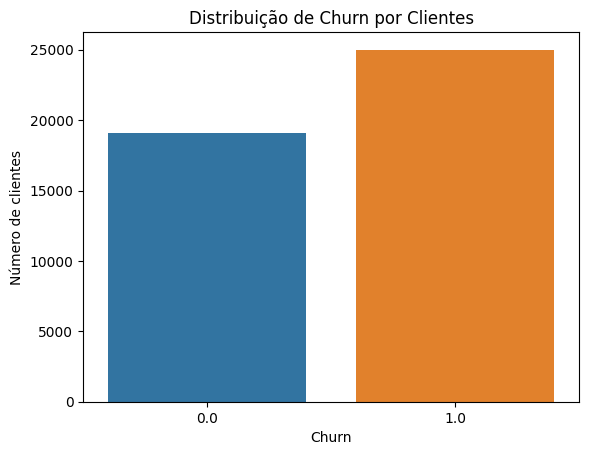

In [14]:
sns.countplot(data=str_churn, x='Churn')

#Pensar num título melhor
plt.title('Distribuição de Churn por Clientes')
plt.ylabel('Número de clientes')
plt.xlabel('Churn')
plt.show()

In [15]:
str_churn['Churn'].value_counts(normalize=True)

Churn
1.0    0.567112
0.0    0.432888
Name: proportion, dtype: float64

- Há um baixo desbalanceamento entre clientes com churn positivo e negativo.

#### Avaliando os clientes com churn positivo x negativo:

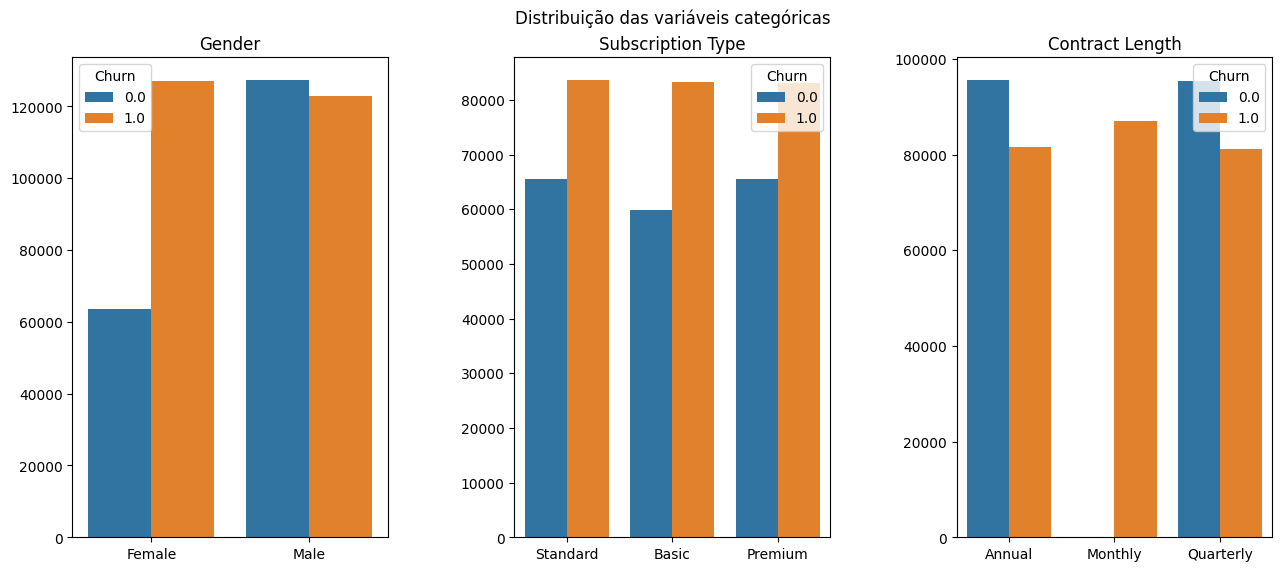

In [16]:
#Não rodar novamente, para manter os gráficos com título, legendas e labels da forma que estão.
category_list = ['Gender', 'Subscription Type', 'Contract Length']
count = 1

plt.subplots(1,3, figsize=(15,6))

for category in category_list:
    plt.subplot(1,3,count)
    sns.countplot(data=churn_train, x=category, hue='Churn')
    plt.ylabel('')
    plt.xlabel('')
    plt.title(category)
    count += 1
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)
    
plt.suptitle('Distribuição das variáveis categóricas')
plt.show()

- Há uma diferença expressiva entre churns positivos e negativos para clientes do sexo feminino.
- Não há clientes de churn negativo que apresentem tempo de contrato mensal (deve afetar o modelo, pois pelo que lembro, no dataset de treino há um bom valor nesse campo *[rever]* ).

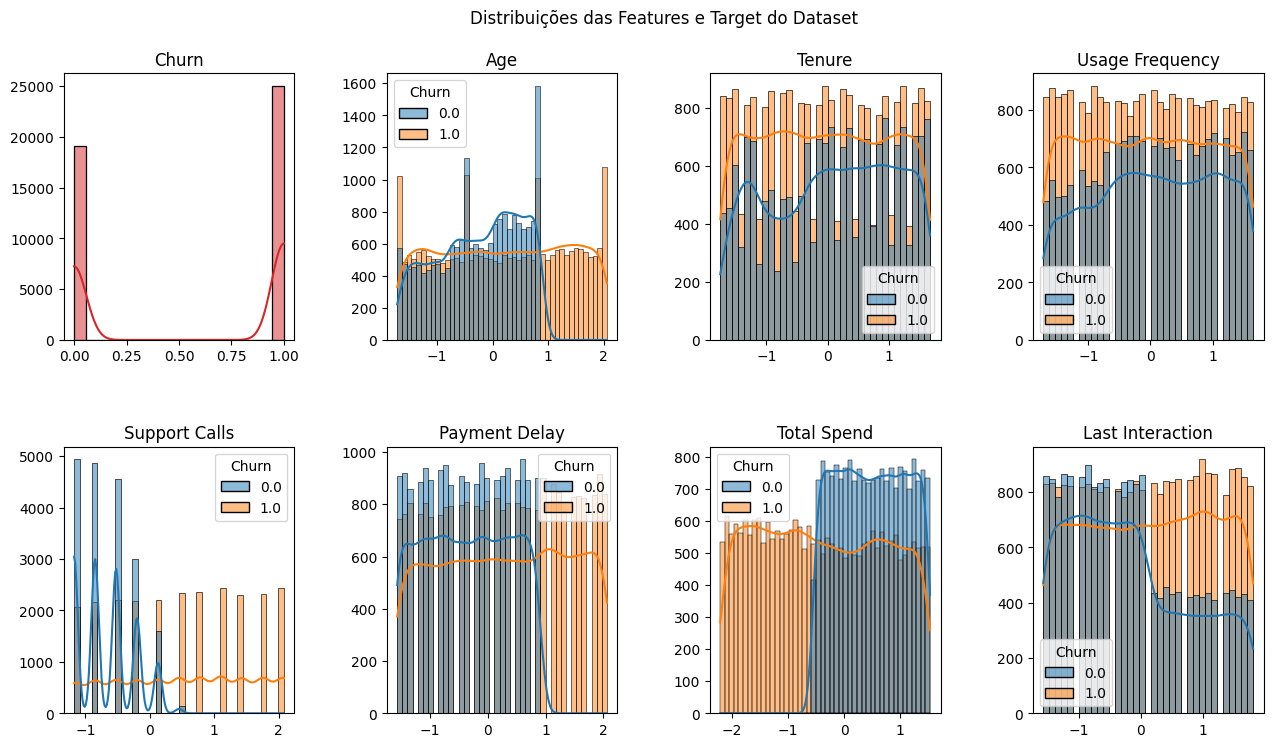

In [17]:
feature_names = ['Churn', 'Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']

fig = plt.figure(figsize=(15,8))

for number, category in enumerate(feature_names, start=1):
    if category == 'Churn':
        ax = fig.add_subplot(2,4,number)
        sns.histplot(data=str_churn, x=category, kde=True, color='tab:red')
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')
    else:
        ax = fig.add_subplot(2, 4,number)
        sns.histplot(data=str_churn, x=category, hue='Churn', kde=True)
        plt.title(category)
        ax.set_ylabel('')
        ax.set_xlabel('')      

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Distribuições das Features e Target do Dataset')
plt.show()

- Nenhuma distribuição segue a curva Normal
- Várias se aproximam de uma distribuição uniforme

- Distribuições das variáveis tem tendências contrárias quando separadas por Churn positivo ou negativo

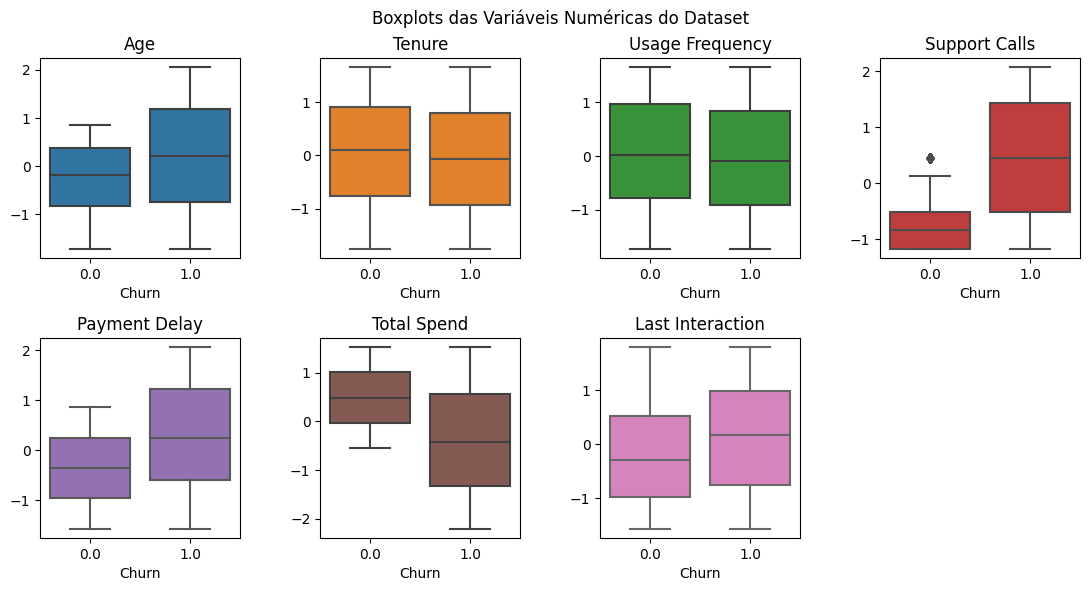

In [18]:
# Boxplot das features
numeric_list = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
colors = {1:'tab:blue', 2:'tab:orange', 3:'tab:green', 4:'tab:red', 5:'tab:purple', 6:'tab:brown', 7: 'tab:pink'}

fig= plt.figure(figsize=(13,6))

for number, category in enumerate(numeric_list, start=1):
    ax = fig.add_subplot(2,4,number)
    sns.boxplot(data=str_churn, y=category, x='Churn', color=colors[number])
    plt.title(category)
    plt.xlabel('Churn')
    ax.set_ylabel('')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

plt.suptitle('Boxplots das Variáveis Numéricas do Dataset')
plt.show()

- Distribuições de ```Age, Support Calls, Payment Delay e Total Spend``` possuem diferenças entre churns negativo e positivo.
- ```Suport Cals e Payment Delay``` com Churn negativo apresentam mediana e quartis mais baixos, ou seja, necessitaram menos do suporte e atrasaram menos seus pagamentos. 
- ```Total Spend``` apresenta o oposto, para o o Churn negativo a mediana e quartis são maiores, ou seja, estes clientes gastam um valor maior.
- Para as coluna ```Age e Last Interaction```, aparenta ter maior amplitude no intervalo interquartil de churn positivo que o observado para churn negativo.
- Este dataset não apresenta **outliers em nenhuma feature**.

In [19]:
str_churn.head()

Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 333733  0.452233 -0.478470         1.303541      -0.848291       0.125245   
  407137 -0.994438 -0.014855         0.138886      -0.848291      -1.570070   
  425708 -0.271102  1.028278        -0.559907      -1.174002      -0.843507   
  266578 -0.592585  0.622615        -0.559907      -0.522581       0.125245   
  438579 -1.155179  1.665748         0.721214      -0.848291       0.004151   

          Total Spend  Last Interaction  Gender  Subscription Type  \
0 333733     0.803578          1.689018     1.0                1.0   
  407137     1.165576          0.060391     1.0                0.0   
  425708     0.110853         -1.451906     0.0                1.0   
  266578    -0.485942         -0.753923     0.0                0.0   
  438579     0.317495          0.758374     1.0                1.0   

          Contract Length  Churn  
0 333733              1.0    0.0  
  407137              1.0    0.0  
  425708              2.0    0.0  
  266578              1.0    0.0  
  438579              1.0    0.0

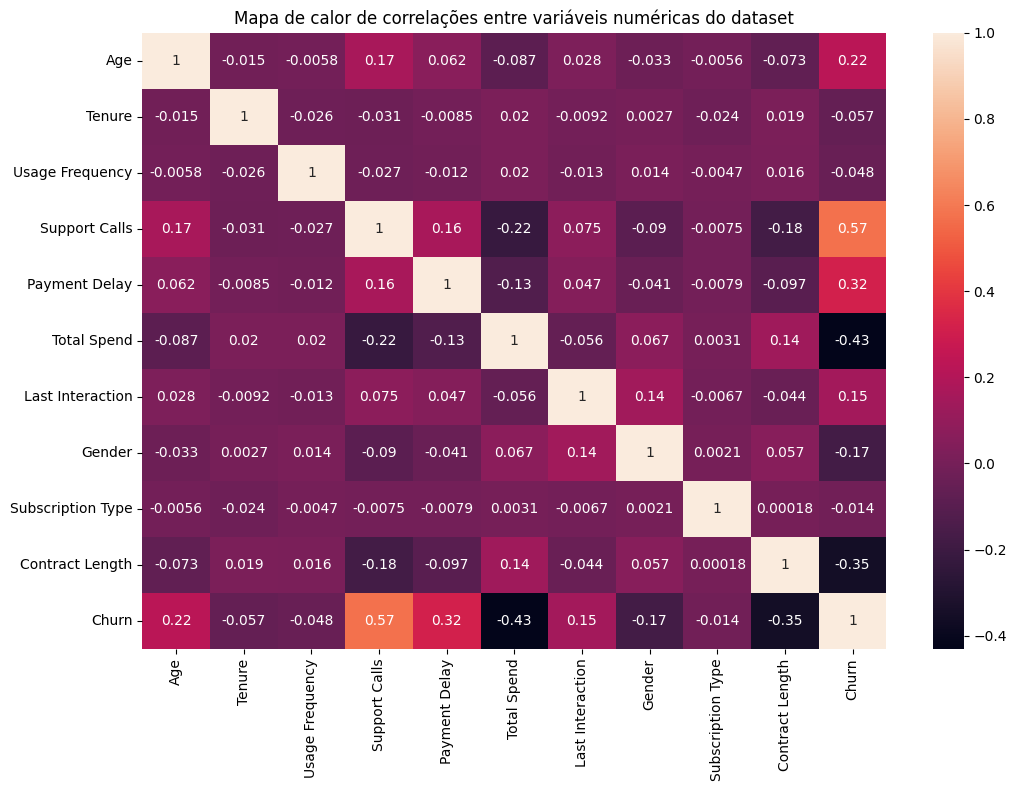

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(str_churn.corr(numeric_only=True), annot=True)
plt.title('Mapa de calor de correlações entre variáveis numéricas do dataset')
plt.show()

- As features que mais se destacam em correlação com o target são: ```Support Calls, Payment Delay, Total Spend, Contract Length```, seguidas por ```Age, Last Interaction, Gender```.
- Além destas, ```Support Calls, Payment Delay, Total Spend```, duas a duas, apresentam certas correlações entre si (variando de -0.22 a 0.16).

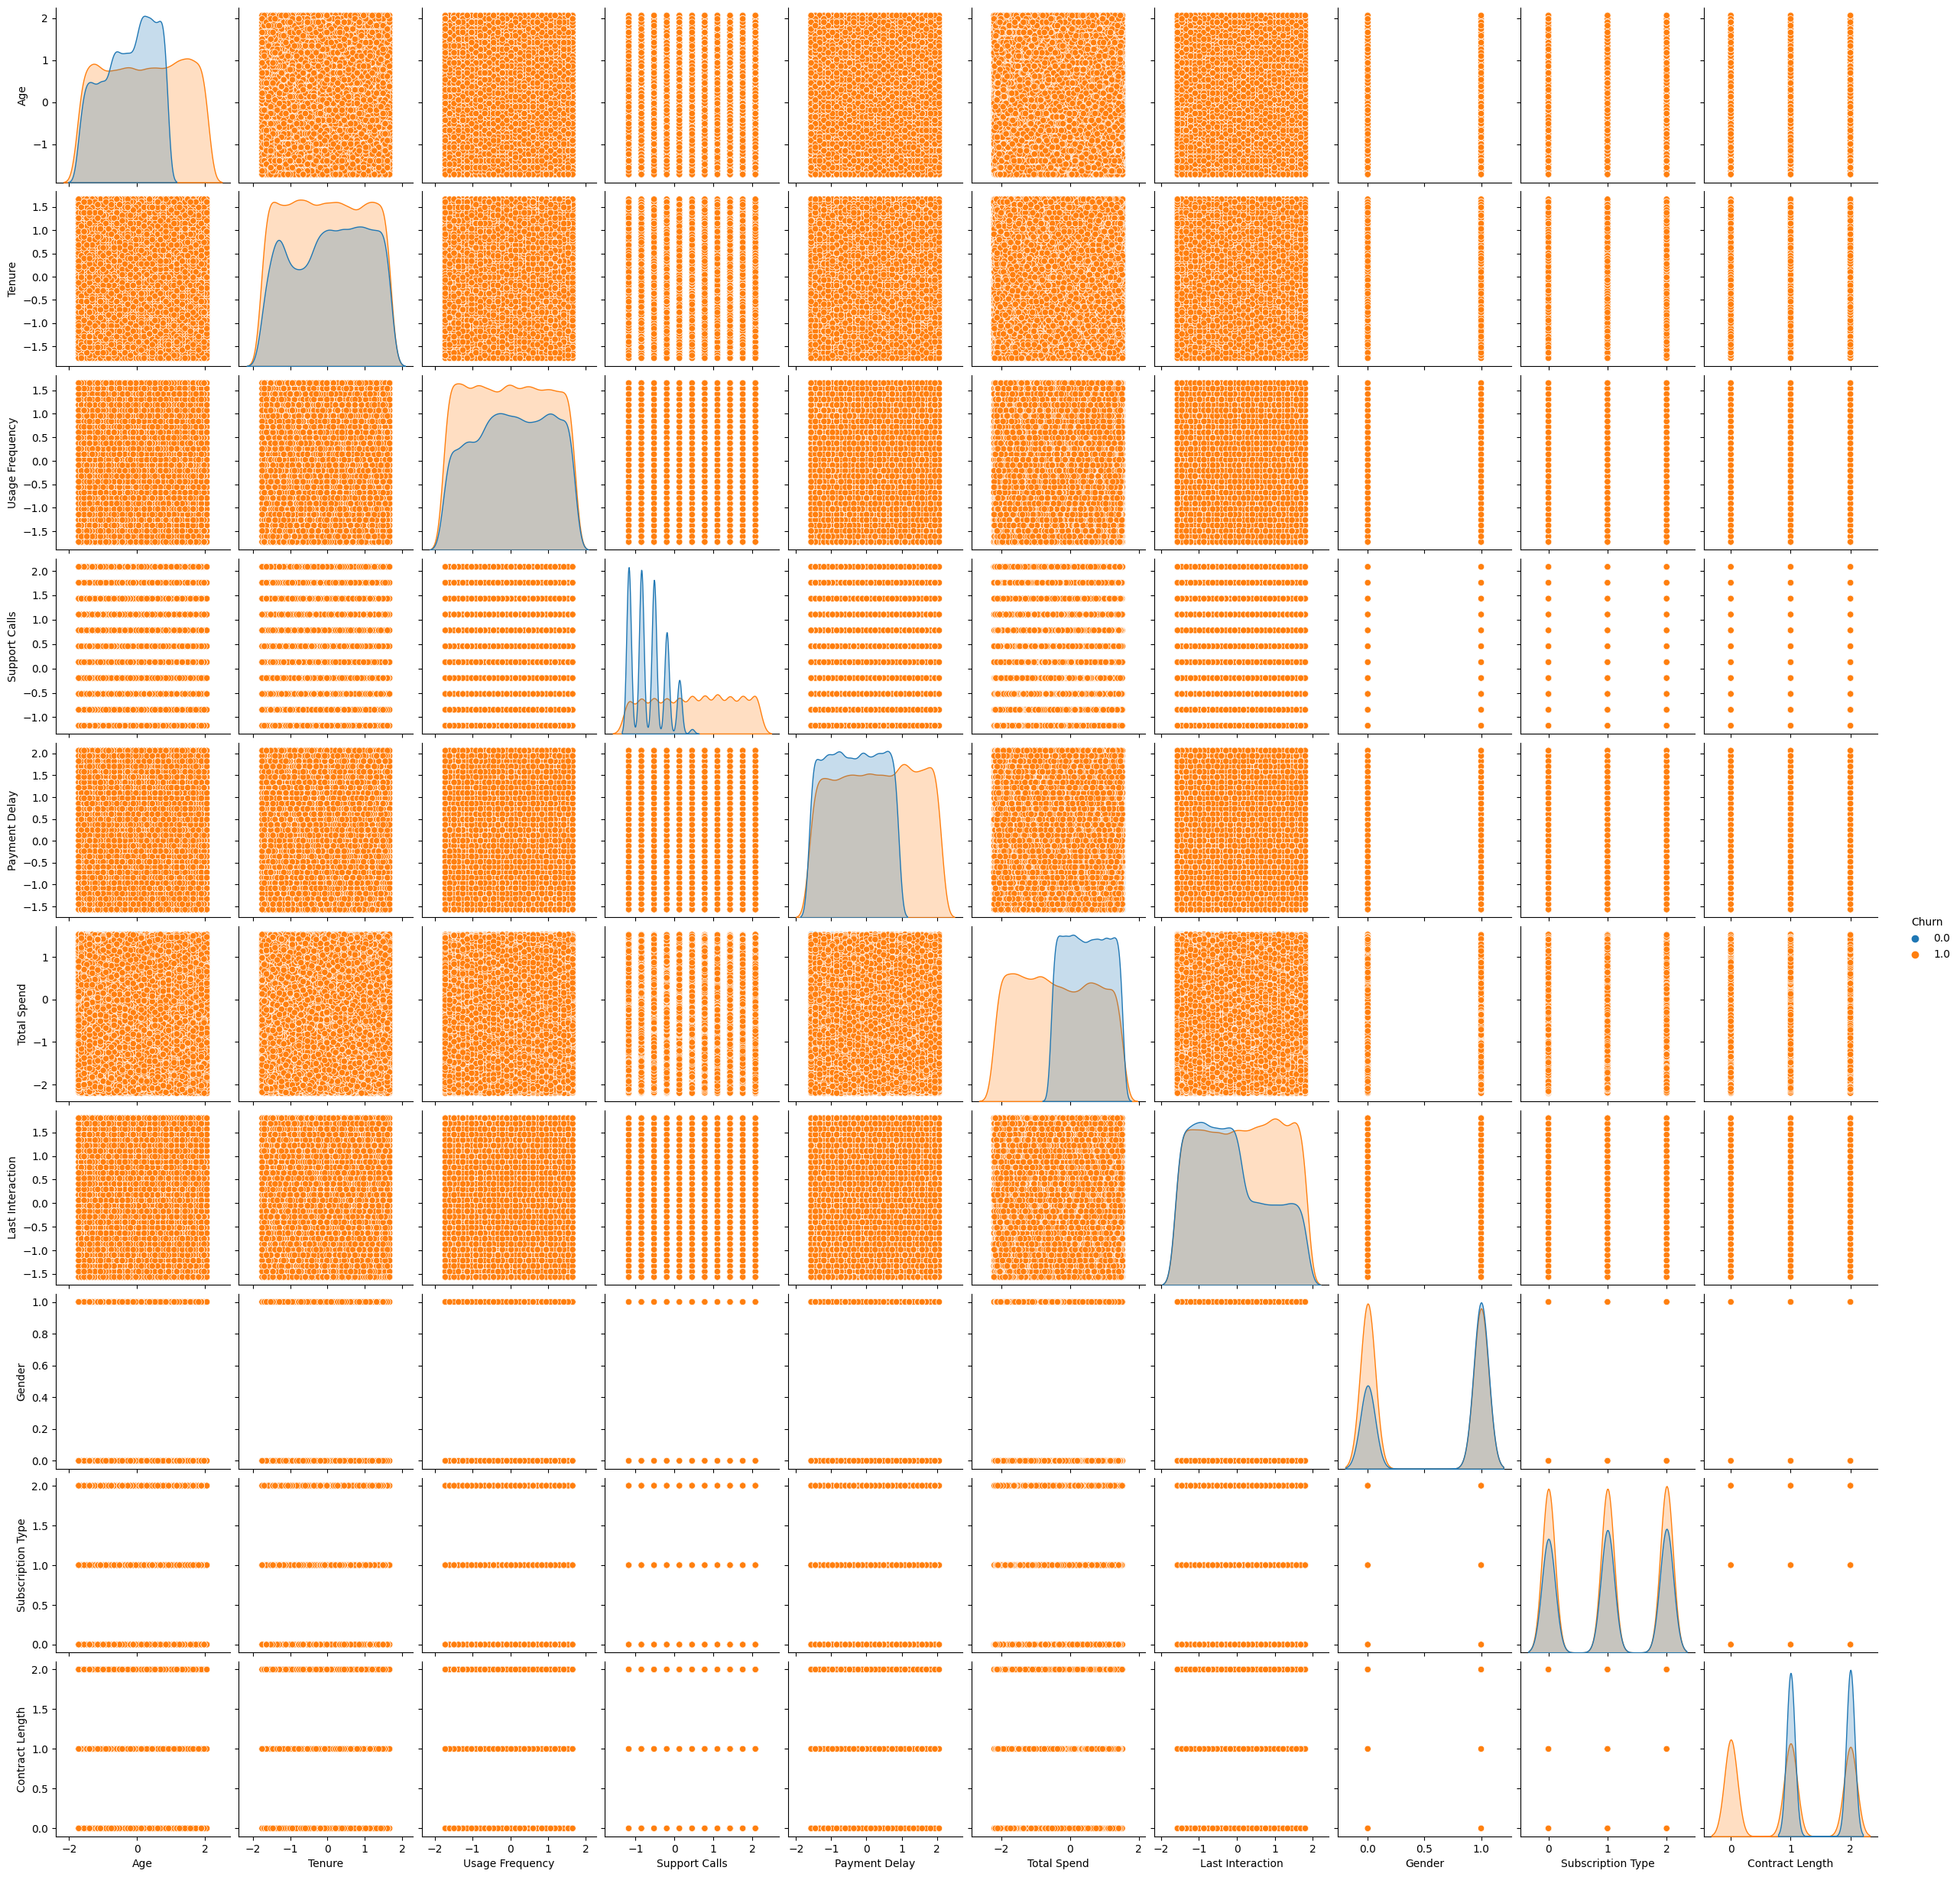

In [21]:
# Repensar o plot do pairplot.
# Como tem mais observações 'Churn' = 1.0, devido a sobreposição, os dados 'Churn' = 0.0 não aparecem, acredito que estão embaixo.
sns.pairplot(data=str_churn, hue='Churn')

- Padrões interessantes, em algumas features parece que o SVM se daria muito bem. Em algumas aparece tipo um L, que me lembra muito o AdaBoost/XGBoost. Observando as curvas kde, deve ter bastante sobreposição também.

## Machine Learning

Baseado no que vimos nesse módulo, o que acredito que seria bacana fazer:
- PCA *(p/ diminuir dimensionalidade)*
- Regressão Logística
- XGBoost *Classifier*
- Suport Vector Machine *Classifier*

#### PCA
**Objetivo:** Diminuir dimensionalidade

In [22]:
#Removendo a coluna de target
X_train = str_churn.drop(columns='Churn')

#### PCA: 2 componentes

In [23]:
# Apesar de juntos, PC1 e PC2, representarem apenas 30% da variância dos dados, tentei rodar abaixo a distribuição.
pca_2 = PCA(n_components=2,random_state=42)
pca_2.fit(X_train)

PCA(n_components=2, random_state=42)

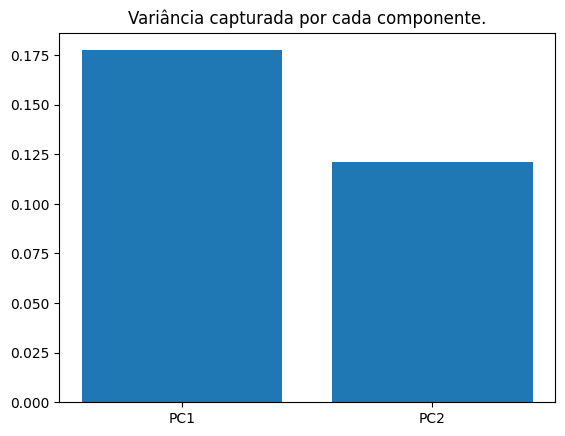

In [24]:
labels = [f'PC{i+1}' for i in range(pca_2.n_components_)]
plt.bar(labels, pca_2.explained_variance_ratio_)
plt.title("Variância capturada por cada componente.")
plt.show()

In [25]:
# Transforma as features do dataset de treino nas features do PCA
X_train_pca_2 = pca_2.transform(X_train)

In [26]:
# Cria um dataset temporário, cópia do original, mas sem os índices, 
# caso contrário não é possível pegar a coluna de "Chrun" para o novo dataset abaixo.
str_churn_temp = str_churn.reset_index(drop=True)

# Cria um dataframe, onde agora as features são os dois PCs do modelo "pca_2"
X_train_pca_2 = pd.DataFrame(X_train_pca_2, columns=['PC1','PC2'])

# Adiciona neste novo dataframe, os dados de "Churn"
X_train_pca_2['Churn'] = str_churn_temp['Churn']
X_train_pca_2.head()

PC1       PC2  Churn
0 -0.351965  1.101072    0.0
1 -2.065407  0.062876    0.0
2 -1.683247 -0.969809    0.0
3 -0.327979 -0.848349    0.0
4 -1.078305 -0.879933    0.0

<Axes: xlabel='PC1', ylabel='PC2'>

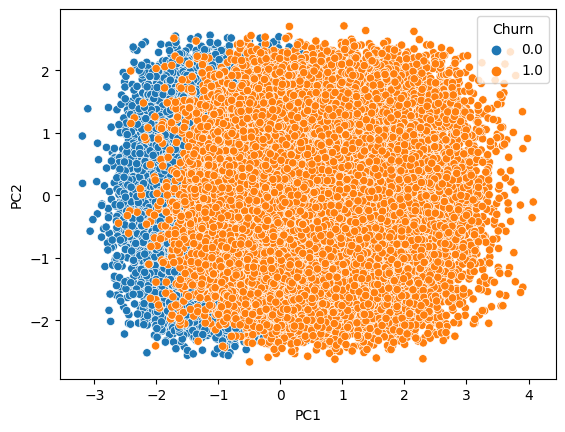

In [27]:
sns.scatterplot(data=X_train_pca_2, x="PC1", y="PC2", hue="Churn")

Mesmo com os componentes PC1 e PC2 representando 30% da variância dos dados, ao utilizar apenas estes componentes é possível notar um padrão/segregação.

#### PCA Completo

In [28]:
#Criando o modelo de PCA e fazendo fit com nossos dados de treino
pca = PCA(random_state=42)
pca.fit(X_train)

PCA(random_state=42)

In [29]:
# Variância capturada por cada componente
pca.explained_variance_ratio_

array([0.17742397, 0.12106487, 0.11702482, 0.11427863, 0.11127406,
       0.10324793, 0.08939864, 0.07818474, 0.06053575, 0.02756658])

- O primeiro componente explica cerca 17.5% da variância nos dados.
- Cada um dos componentes 2 a 6, explica, em média 11%, a variância dos dados.
- Os componentes 7 a 9, explicam aprox.: 9%, 8% e 6%, respectivamente.
- O décimo componente explica apenas 2.8% da variância dos dados.

In [30]:
#print(pca.components_)
print(pca.feature_names_in_)

['Age' 'Tenure' 'Usage Frequency' 'Support Calls' 'Payment Delay'
 'Total Spend' 'Last Interaction' 'Gender' 'Subscription Type'
 'Contract Length']


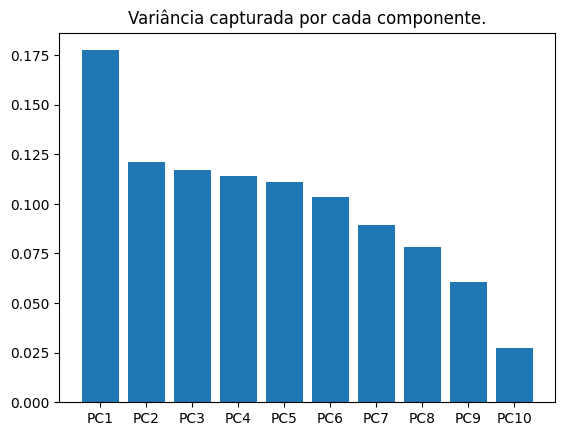

In [31]:
labels = [f'PC{i+1}' for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_)
plt.title("Variância capturada por cada componente.")
plt.show()

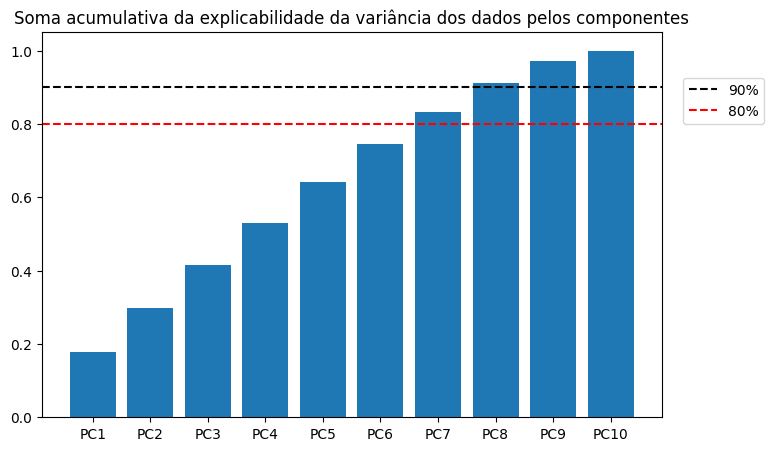

In [32]:
# Utilizando o modelo com os 10 componentes do PCA
plt.figure(figsize=(8,5))
labels = [f'PC{i+1}' for i in range(pca.n_components_)]
plt.bar(labels, pca.explained_variance_ratio_.cumsum())
plt.axhline(y=0.9, color='k', linestyle= '--', label="90%")
plt.axhline(y=0.8, color='r', linestyle= '--', label="80%")
plt.legend(bbox_to_anchor = (1.1, 0.9), loc = 'upper center')
plt.title("Soma acumulativa da explicabilidade da variância dos dados pelos componentes")
plt.show()

In [33]:
print("Soma acumulativa da explicabilidade dos componentes: \n")
for soma in enumerate(pca.explained_variance_ratio_.cumsum()):
    print(f"Até o {soma[0]+1}º = {round(soma[1]*100,1)} %")

Soma acumulativa da explicabilidade dos componentes: 

Até o 1º = 17.7 %
Até o 2º = 29.8 %
Até o 3º = 41.6 %
Até o 4º = 53.0 %
Até o 5º = 64.1 %
Até o 6º = 74.4 %
Até o 7º = 83.4 %
Até o 8º = 91.2 %
Até o 9º = 97.2 %
Até o 10º = 100.0 %


```Comentário de explicação (remover posteriormente):```

Como no PCA as features viram nossos componentes (que são a combinação das features originais), acabamos perdendo um pouco da explicabilidade do modelo, além de que a variancia dos dados não é altamente representada por poucos componentes. 

Já que não temos tantas features, acredito que nem seria tão essencial usar o PCA, mas quem sabe seja necessário pelo critério de apresentar algo que envolvia aprendizagem não-supervisionada.

Uma ideia que me surgiu foi: caso haja tempo, depois rodar o modelo sem o PCA, pra ver se tem uma mlehora nas métricas.

#### DATASET APÓS PCA

Neste caso, analisando os gráficos acima, poderíamos decicidir em usar apenas os 7 ou 8 primeiros componentes. 

In [35]:
# Decidir se será usado 7 ou 8 componentes e então rodar essa célula.

# Cria e fita o PCA
pca_final = PCA(n_components = 8, random_state=42)
pca_final.fit(X_train)

# Transforma as features do dataset de treino nas features do PCA
X_train_pca = pca_final.transform(X_train)

# Cria um dataframe, onde agora as features são o componentes do pca_final
labels_pca_final = [f"PC{i+1}" for i in range(pca_final.n_components_)]
X_train_pca = pd.DataFrame(X_train_pca, columns=labels_pca_final)

# Adiciona neste novo dataframe, os dados de "Churn"
churn_pca = X_train_pca.copy()
churn_pca['Churn'] = str_churn_temp['Churn']
churn_pca.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.351965  1.101072  1.629799 -0.963567 -0.768220  0.821242 -0.457781   
1 -2.065407  0.062876  0.584297  0.067790 -0.347056 -0.515050  0.573834   
2 -1.683247 -0.969809 -1.340847  0.117571  0.012232 -0.503085 -0.562983   
3 -0.327979 -0.848349 -0.673664  0.075448  0.789493 -0.360567 -0.391412   
4 -1.078305 -0.879933  0.823903 -1.728291  0.586526 -0.151575 -0.069949   

        PC8  Churn  
0 -0.003457    0.0  
1  1.033791    0.0  
2  0.018783    0.0  
3  1.006330    0.0  
4 -0.098715    0.0

### Importando e transformando os dados de teste

In [ ]:
#Removendo coluna de CustomerID
#churn_test.drop(columns="CustomerID", inplace=True)

# Não tem nulos, já verificado

# Aplica as mesmas transformações de scaling e encoding dos dados de treino
churn_test_coded = preprocess.transform(churn_test)

#Cria o novo dataset, já transformado
churn_test_coded = pd.DataFrame(churn_test_coded, columns=new_columns)
churn_test_coded.head()

Age    Tenure  Usage Frequency  Support Calls  Payment Delay  \
0 -1.396291 -0.362566        -0.210511       0.128839       1.699466   
1  0.130751 -0.188711         1.420007       1.105969       0.004151   
2  0.612974 -0.246662        -0.676373      -0.522581       1.941654   
3 -0.351473 -1.289796        -0.443442       0.454549       0.488527   
4  1.095198  1.549845         0.954145       1.757390      -1.327882   

   Total Spend  Last Interaction  Gender  Subscription Type  Contract Length  \
0    -0.139601         -0.637592     0.0                0.0              0.0   
1    -0.197740          0.642043     0.0                1.0              0.0   
2     0.520691          0.758374     1.0                2.0              2.0   
3    -1.659517          0.409382     1.0                2.0              1.0   
4    -0.409531          0.409382     0.0                1.0              2.0   

   Churn  
0    1.0  
1    0.0  
2    0.0  
3    0.0  
4    0.0

In [65]:
#Aplica o PCA nos dados de teste
X_test_pca = pca_final.transform(churn_test_coded.drop(columns='Churn'))

In [66]:
# Separa os dados para treino e teste

X_train = X_train_pca
y_train = str_churn_temp['Churn']

X_test = pd.DataFrame(X_test_pca, columns=labels_pca_final)
y_test = churn_test_coded['Churn']

### Regressão Logística

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [68]:
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

LogisticRegression()

In [69]:
y_pred = model_log.predict(X_test)

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.22      0.36     33881
         1.0       0.53      0.98      0.69     30493

    accuracy                           0.58     64374
   macro avg       0.74      0.60      0.53     64374
weighted avg       0.75      0.58      0.52     64374

